In [1]:
# hide pakcage non critical warnings

import warnings

warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from easydict import EasyDict as edict
import matplotlib.pyplot as plt

In [7]:
import devkit.api as dk

In [8]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
import scipy.io as sio

In [9]:
os.path.abspath(os.path.join(os.path.dirname('__file__'), "..", ".."))

'/home/egxxlch/dev/proof-of-concept'

In [10]:
sys.path.append(
    os.path.abspath(
        os.path.join(os.path.dirname('__file__'), "..", "..")
    ))

# load data & make graph

## load data

In [12]:
df_cic = pd.read_parquet("../../data/raw/cic_v2/df_cic_5000_perclass_20200822.csv.parquet.gzip")

In [13]:
df_cic.columns

Index(['eci', 'bandwidth', 'branch_name', 'carrier', 'carrier_id', 'cell_name',
       'enb_name', 'enb_number', 'enb_type', 'enb_vendor', 'prefecture_name',
       'sector', 'sector_id', 'sector_ref_id', 'date_time', 'cell_key',
       'max_rrc_conn_users', 'avg_rrc_conn_users', 'avg_prb_util_dl',
       'avg_prb_util_ul', 'cac_data_in_buffer',
       'cac_data_buffer_time_exceed_tresh', 'avg_pdcch_cce_load',
       'rrc_init_att', 'rrc_init_sr', 'reconn_att', 'reconn_sr',
       'voice_reconn_att', 'voice_reconn_sr', 'mo_signaling_att',
       'mo_signaling_sr', 'mo_data_uncompleted_call',
       'mt_access_uncompleted_call', 'mo_data_received', 'mo_data_sr',
       'mt_access_att', 'mt_access_sr', 'avg_user_thp_dl', 'avg_user_thp_ul',
       'lcp_dl_thp_nonca', 'avg_cqi', 'avg_bler_dl', 'avg_ul_pathloss',
       'avg_prach_interference', 'avg_pucch_interference',
       'avg_pusch_interference', 'ho_completed_sr', 'resource_limit_count',
       'date8', 'class1', 'prob1', 'mse'],
  

In [14]:
df_cic['date_time'] = pd.to_datetime(df_cic['date_time'])

In [15]:
df_cic['date'] = df_cic['date_time'].dt.date

df_cic['hour'] = df_cic['date_time'].dt.hour

In [16]:
df_cic = df_cic.sort_values(['cell_key', 'date_time'])

In [17]:
df_cic.head()

eci  bandwidth branch_name carrier  carrier_id cell_name  \
18724  120003840         10          中国  800MHz           1   倉敷浦田＋ｓ１   
18725  120003840         10          中国  800MHz           1   倉敷浦田＋ｓ１   
18726  120003840         10          中国  800MHz           1   倉敷浦田＋ｓ１   
18727  120003840         10          中国  800MHz           1   倉敷浦田＋ｓ１   
18728  120003840         10          中国  800MHz           1   倉敷浦田＋ｓ１   

      enb_name  enb_number  enb_type enb_vendor  ... avg_pucch_interference  \
18724    水島東Ｈａ       10013  BS-3001形        NEC  ...                 0.1010   
18725    水島東Ｈａ       10013  BS-3001形        NEC  ...                 0.0980   
18726    水島東Ｈａ       10013  BS-3001形        NEC  ...                 0.0995   
18727    水島東Ｈａ       10013  BS-3001形        NEC  ...                 0.0960   
18728    水島東Ｈａ       10013  BS-3001形        NEC  ...                 0.0960   

      avg_pusch_interference  ho_completed_sr  resource_limit_count     date8  \
18724                 0.1075             1.00              0.046813  20200822   
18725                 0.1060             1.00              0.041132  20200822   
18726                 0.1065             0.37              0.038526  20200822   
18727                 0.1020             1.00              0.048771  20200822   
18728                 0.1010             1.00              0.033411  20200822   

      class1     prob1       mse        date  hour  
18724  ho_SR  0.998619  0.016881  2020-08-22     0  
18725  ho_SR  0.998619  0.016881  2020-08-22     1  
18726  ho_SR  0.998619  0.016881  2020-08-22     2  
18727  ho_SR  0.998619  0.016881  2020-08-22     3  
18728  ho_SR  0.998619  0.016881  2020-08-22     4  

[5 rows x 54 columns]

In [18]:
lst_std_kpis = ['max_rrc_conn_users', 'avg_rrc_conn_users', 'avg_prb_util_dl',
       'avg_prb_util_ul', 'cac_data_in_buffer',
       'cac_data_buffer_time_exceed_tresh', 'avg_pdcch_cce_load',
       'rrc_init_att', 'rrc_init_sr', 'reconn_att', 'reconn_sr',
       'voice_reconn_att', 'voice_reconn_sr', 'mo_signaling_att',
       'mo_signaling_sr', 'mo_data_uncompleted_call',
       'mt_access_uncompleted_call', 'mo_data_received', 'mo_data_sr',
       'mt_access_att', 'mt_access_sr', 'avg_user_thp_dl', 'avg_user_thp_ul',
       'lcp_dl_thp_nonca', 'avg_cqi', 'avg_bler_dl', 'avg_ul_pathloss',
       'avg_prach_interference', 'avg_pucch_interference',
       'avg_pusch_interference', 'ho_completed_sr', 'resource_limit_count']

In [19]:
df_cic.columns

Index(['eci', 'bandwidth', 'branch_name', 'carrier', 'carrier_id', 'cell_name',
       'enb_name', 'enb_number', 'enb_type', 'enb_vendor', 'prefecture_name',
       'sector', 'sector_id', 'sector_ref_id', 'date_time', 'cell_key',
       'max_rrc_conn_users', 'avg_rrc_conn_users', 'avg_prb_util_dl',
       'avg_prb_util_ul', 'cac_data_in_buffer',
       'cac_data_buffer_time_exceed_tresh', 'avg_pdcch_cce_load',
       'rrc_init_att', 'rrc_init_sr', 'reconn_att', 'reconn_sr',
       'voice_reconn_att', 'voice_reconn_sr', 'mo_signaling_att',
       'mo_signaling_sr', 'mo_data_uncompleted_call',
       'mt_access_uncompleted_call', 'mo_data_received', 'mo_data_sr',
       'mt_access_att', 'mt_access_sr', 'avg_user_thp_dl', 'avg_user_thp_ul',
       'lcp_dl_thp_nonca', 'avg_cqi', 'avg_bler_dl', 'avg_ul_pathloss',
       'avg_prach_interference', 'avg_pucch_interference',
       'avg_pusch_interference', 'ho_completed_sr', 'resource_limit_count',
       'date8', 'class1', 'prob1', 'mse', 'da

In [20]:
df_cic_wide = df_cic.groupby(['date', 'cell_key', 'hour'])[lst_std_kpis].sum().unstack()

In [21]:
new_cols = [" ".join(map(str, df_cic_wide.columns.tolist()[i])).replace(" ", "_") for i in range(df_cic_wide.shape[1])]
df_cic_wide.columns = new_cols
df_cic_wide = df_cic_wide.reset_index().set_index(['cell_key']).drop(['date'], axis=1)

In [22]:
df_y = df_cic[['cell_key', 'eci', 'class1', 'prob1', 'mse']].drop_duplicates().set_index(['cell_key'])

In [23]:
df_y.head()

eci  \
cell_key                                                        
中国_10013_水島東Ｈａ_NEC_BS-3001形_1_1_120003840_20133...  120003840   
中国_10059_入田Ａａ_NEC_BS-3001形_4_1_120015619_200330...  120015619   
中国_10097_笠岡新横島Ａａ_Fujitsu_BS-3001形_5_1_120025348...  120025348   
中国_10097_笠岡新横島Ａａ_Fujitsu_BS-3001形_6_1_120025349...  120025349   
中国_10181_真庭粟谷東Ａａ_Fujitsu_BS-3001形_4_1_120046851...  120046851   

                                                              class1  \
cell_key                                                               
中国_10013_水島東Ｈａ_NEC_BS-3001形_1_1_120003840_20133...             ho_SR   
中国_10059_入田Ａａ_NEC_BS-3001形_4_1_120015619_200330...  access_cell_edge   
中国_10097_笠岡新横島Ａａ_Fujitsu_BS-3001形_5_1_120025348...  access_cell_edge   
中国_10097_笠岡新横島Ａａ_Fujitsu_BS-3001形_6_1_120025349...  access_cell_edge   
中国_10181_真庭粟谷東Ａａ_Fujitsu_BS-3001形_4_1_120046851...  access_cell_edge   

                                                       prob1       mse  
cell_key                                                                
中国_10013_水島東Ｈａ_NEC_BS-3001形_1_1_120003840_20133...  0.998619  0.016881  
中国_10059_入田Ａａ_NEC_BS-3001形_4_1_120015619_200330...  1.000000  0.034762  
中国_10097_笠岡新横島Ａａ_Fujitsu_BS-3001形_5_1_120025348...  1.000000  0.024167  
中国_10097_笠岡新横島Ａａ_Fujitsu_BS-3001形_6_1_120025349...  0.999999  0.014618  
中国_10181_真庭粟谷東Ａａ_Fujitsu_BS-3001形_4_1_120046851...  1.000000  0.025824

In [24]:
df_cic_wide = df_cic_wide.merge(df_y, how='left', left_index=True, right_index=True)

In [25]:
assert df_cic_wide.index.get_level_values(level='cell_key').nunique() == len(df_cic_wide)

In [26]:
df_cic_wide = df_cic_wide.sort_index()

In [27]:
arr_cell_id = df_cic_wide['eci'].values
arr_class1 = df_cic_wide['class1'].values
arr_prob1 = df_cic_wide['prob1'].values
arr_mse = df_cic_wide['mse'].values


In [28]:
arr_class1

array(['ho_SR', 'access_cell_edge', 'access_cell_edge', ...,
       'access_cell_edge', 'no_issue', 'normal'], dtype=object)

In [26]:
feat_norm_wide = df_cic_wide.drop(columns=['eci', 'class1', 'prob1', 'mse']).values

In [27]:
feat_norm_wide.shape

(28302, 768)

In [28]:
feat_norm = df_cic_wide.drop(columns=['eci', 'class1', 'prob1', 'mse']).values.reshape(-1, len(lst_std_kpis), 24)  # from wide table to  3d array
# feat_norm = df_cic[lst_std_kpis].values.reshape(-1, 24, len(lst_std_kpis))  # from long table to  3d array

In [29]:
feat_norm.shape

(28302, 32, 24)

## viz raw data

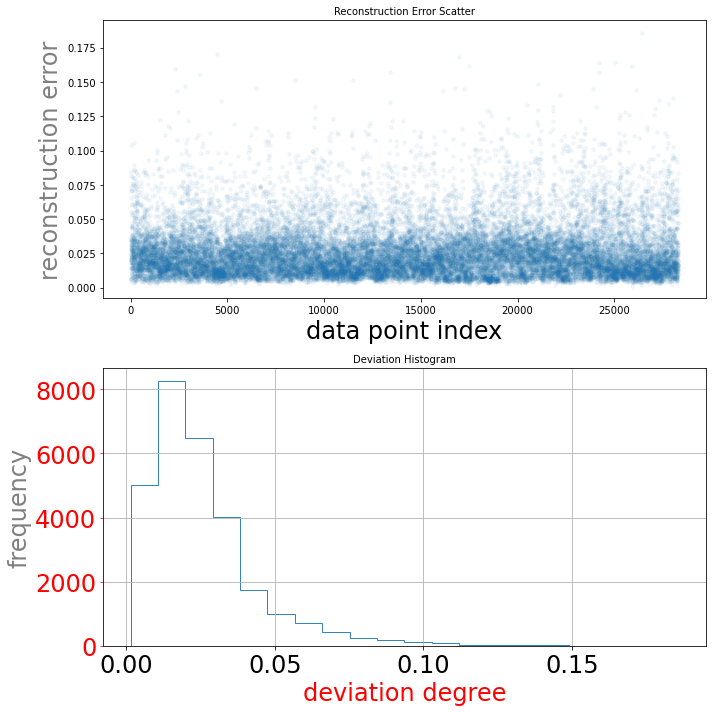

In [146]:
dk.mgcVizMseDistribution(arr_mse, inlier_ts=None, outlier_ts=None, figsize=(10, 10))

['prob1: 1.00, mse: 0.02',
 'prob1: 1.00, mse: 0.03',
 'prob1: 1.00, mse: 0.02',
 'prob1: 1.00, mse: 0.01',
 'prob1: 1.00, mse: 0.03',
 'prob1: 1.00, mse: 0.08',
 'prob1: 1.00, mse: 0.03',
 'prob1: 1.00, mse: 0.04',
 'prob1: 1.00, mse: 0.06',
 'prob1: 1.00, mse: 0.03',
 'prob1: 1.00, mse: 0.02',
 'prob1: 1.00, mse: 0.03',
 'prob1: 1.00, mse: 0.03',
 'prob1: 1.00, mse: 0.02',
 'prob1: 1.00, mse: 0.02',
 'prob1: 1.00, mse: 0.02',
 'prob1: 1.00, mse: 0.01',
 'prob1: 1.00, mse: 0.00',
 'prob1: 1.00, mse: 0.07',
 'prob1: 1.00, mse: 0.02',
 'prob1: 1.00, mse: 0.04',
 'prob1: 0.99, mse: 0.03',
 'prob1: 1.00, mse: 0.03',
 'prob1: 1.00, mse: 0.02',
 'prob1: 1.00, mse: 0.02',
 'prob1: 1.00, mse: 0.02',
 'prob1: 1.00, mse: 0.02',
 'prob1: 1.00, mse: 0.01',
 'prob1: 1.00, mse: 0.03',
 'prob1: 1.00, mse: 0.01',
 'prob1: 1.00, mse: 0.01',
 'prob1: 1.00, mse: 0.01',
 'prob1: 1.00, mse: 0.03',
 'prob1: 1.00, mse: 0.04',
 'prob1: 1.00, mse: 0.04',
 'prob1: 1.00, mse: 0.02',
 'prob1: 1.00, mse: 0.01',
 

total samples: 15 / 5000
unique samples: 15 / 5000


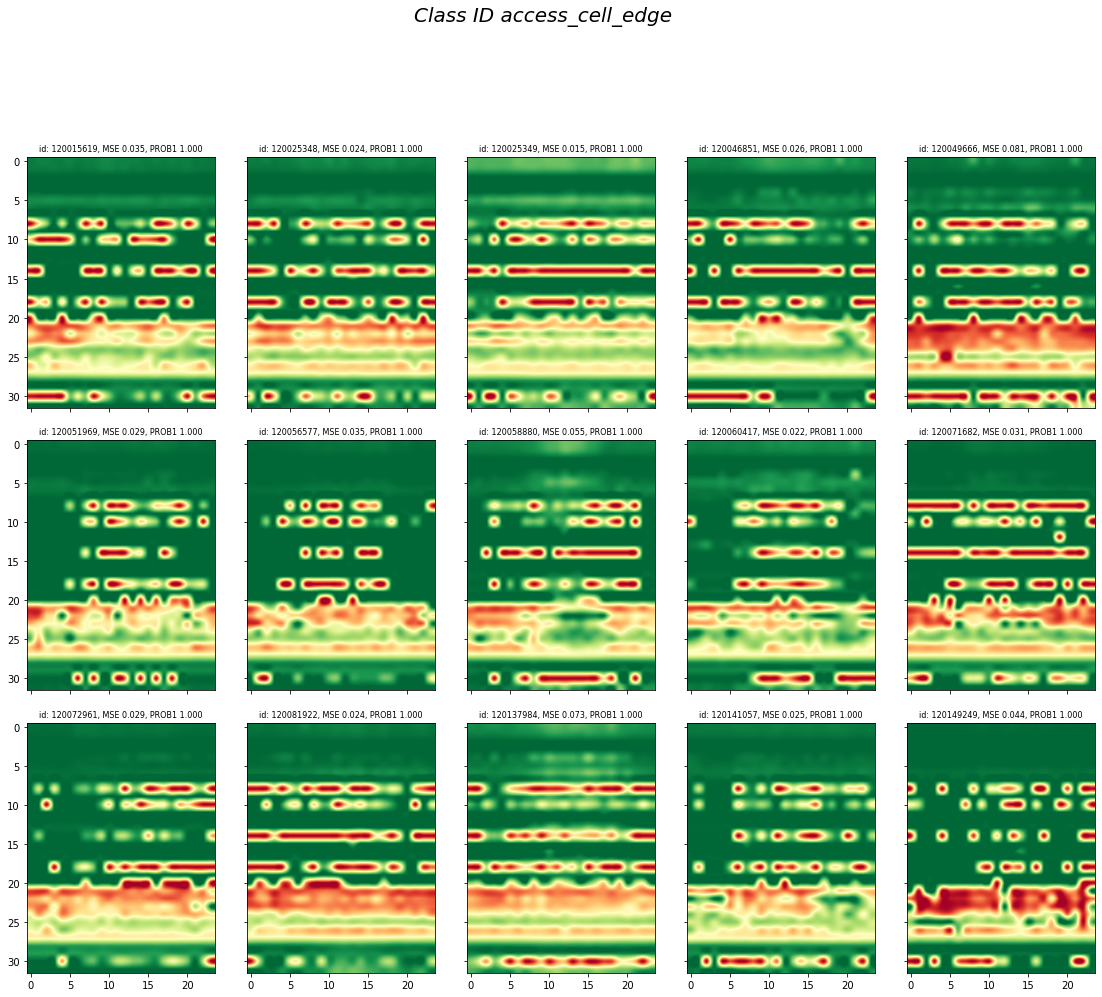

total samples: 15 / 45
unique samples: 15 / 45


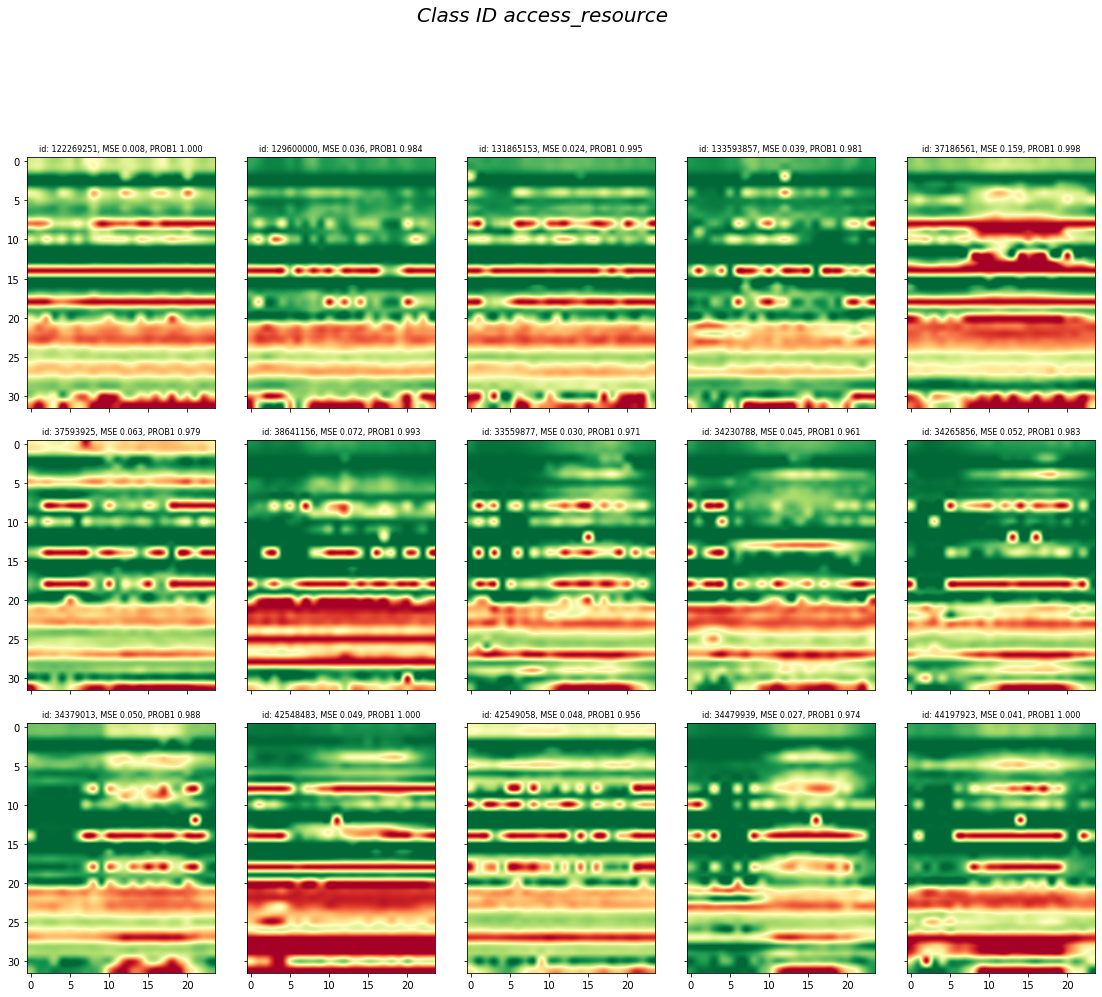

total samples: 15 / 1488
unique samples: 15 / 1488


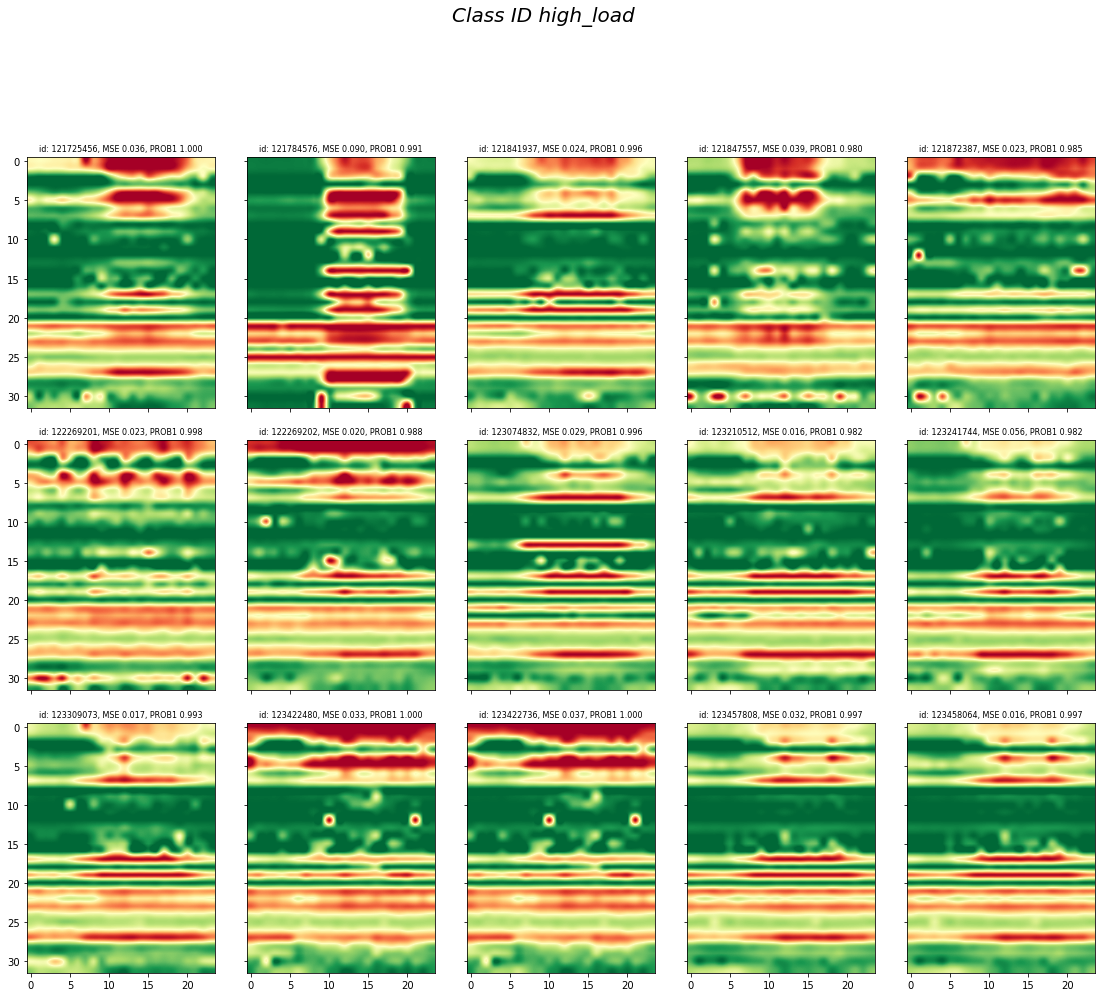

total samples: 15 / 5000
unique samples: 15 / 5000


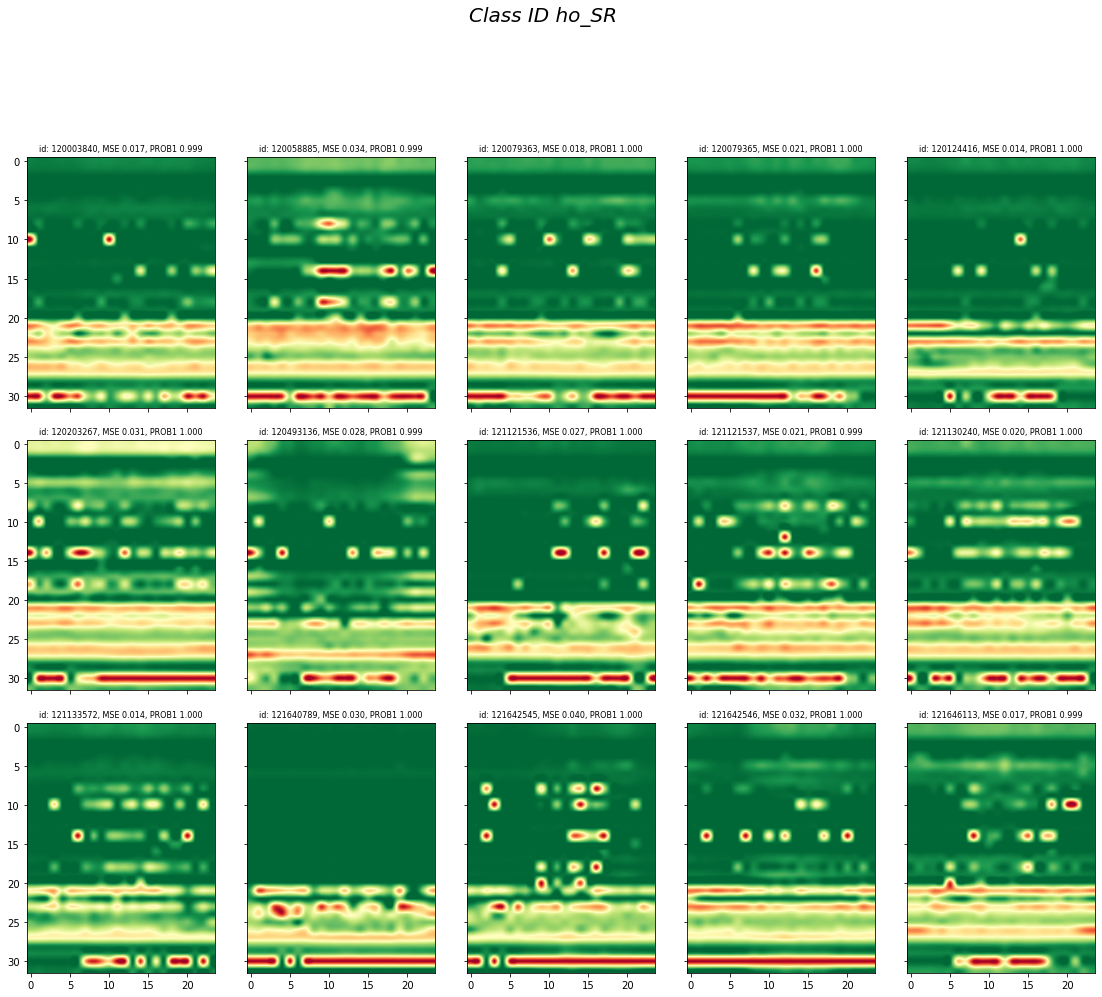

total samples: 15 / 5000
unique samples: 15 / 5000


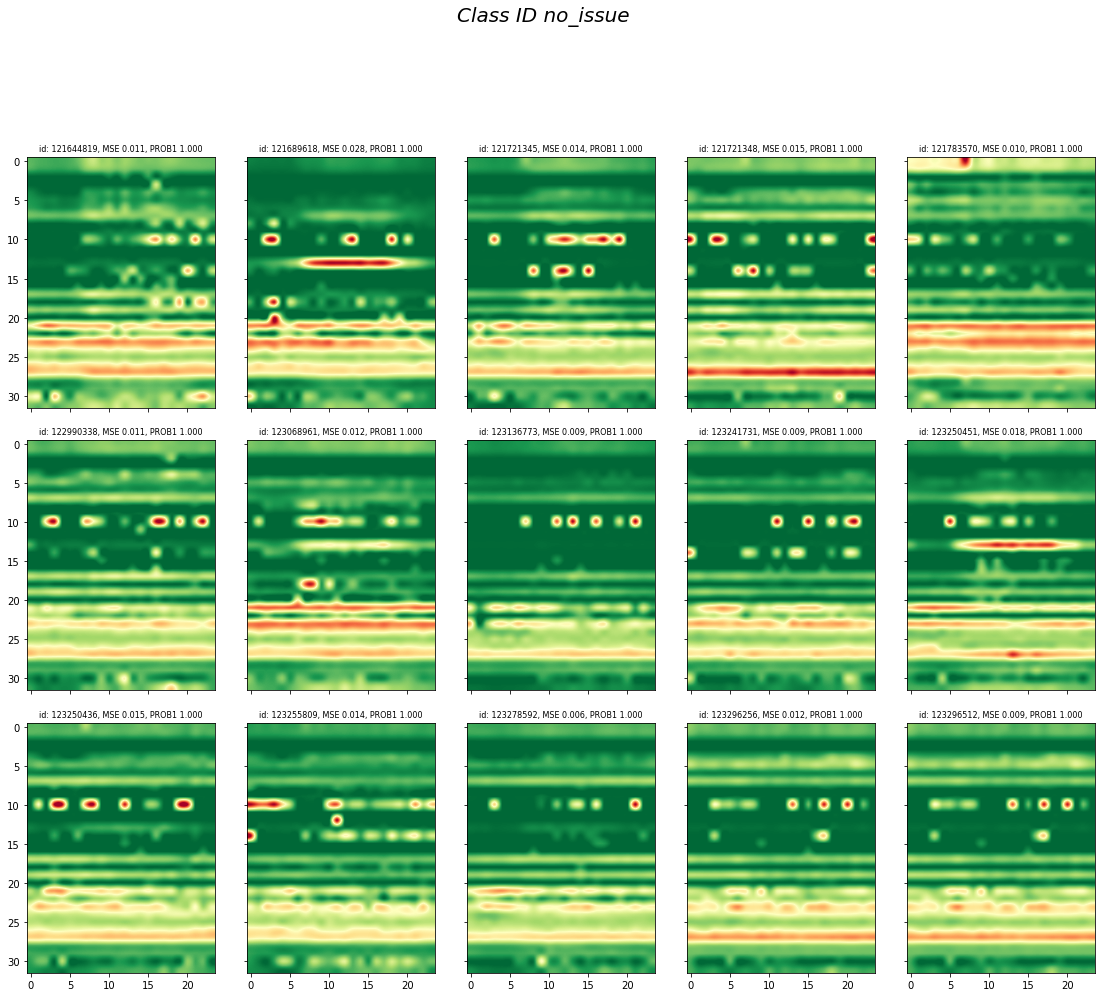

total samples: 15 / 5000
unique samples: 15 / 5000


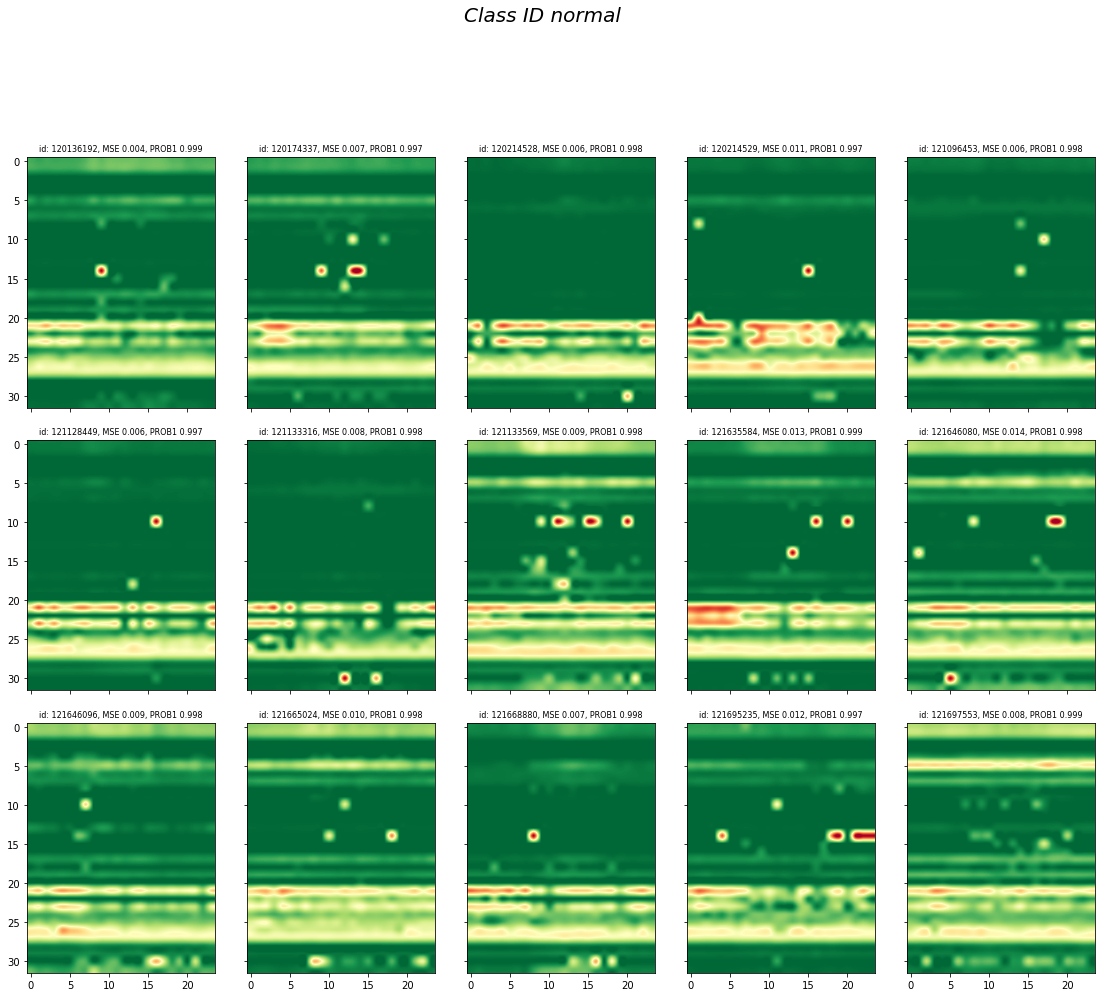

total samples: 15 / 427
unique samples: 15 / 427


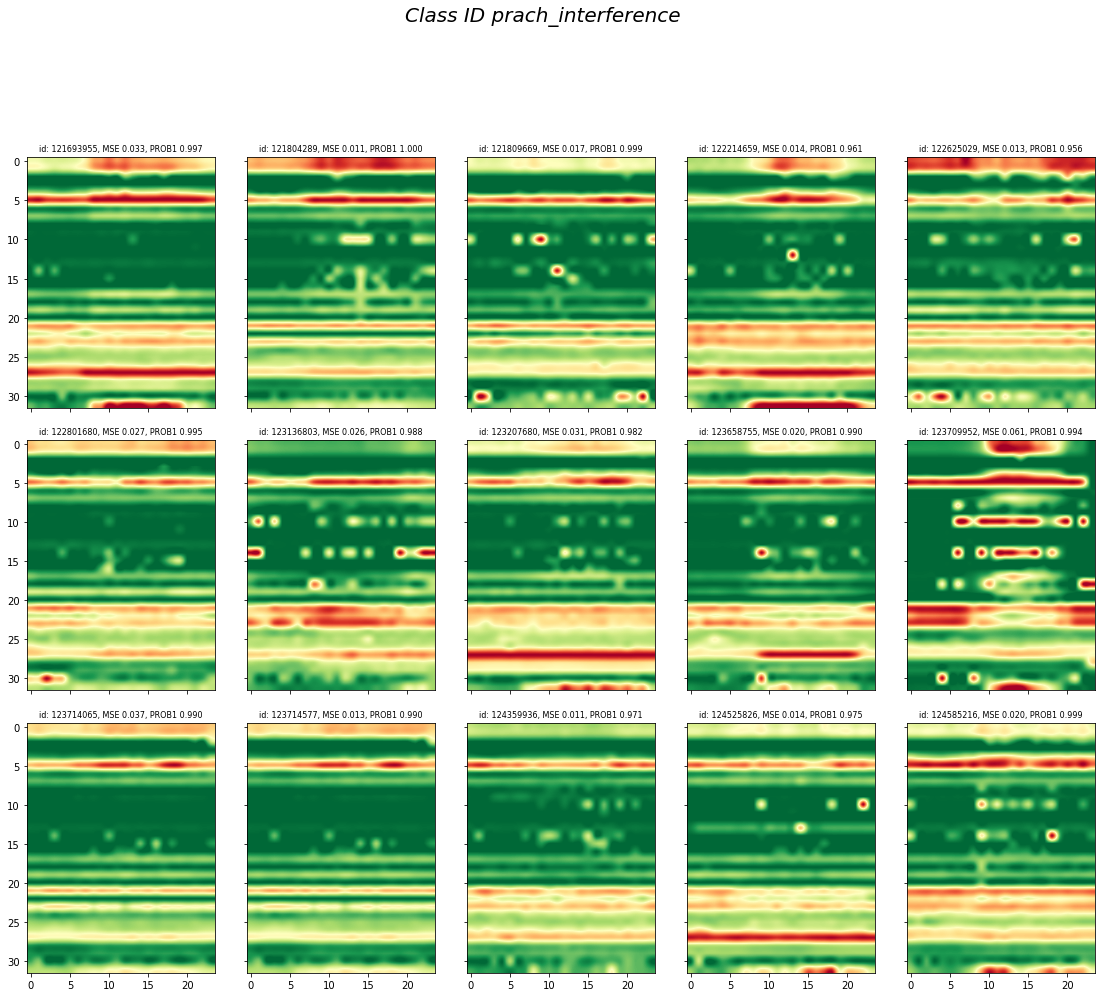

total samples: 15 / 749
unique samples: 15 / 749


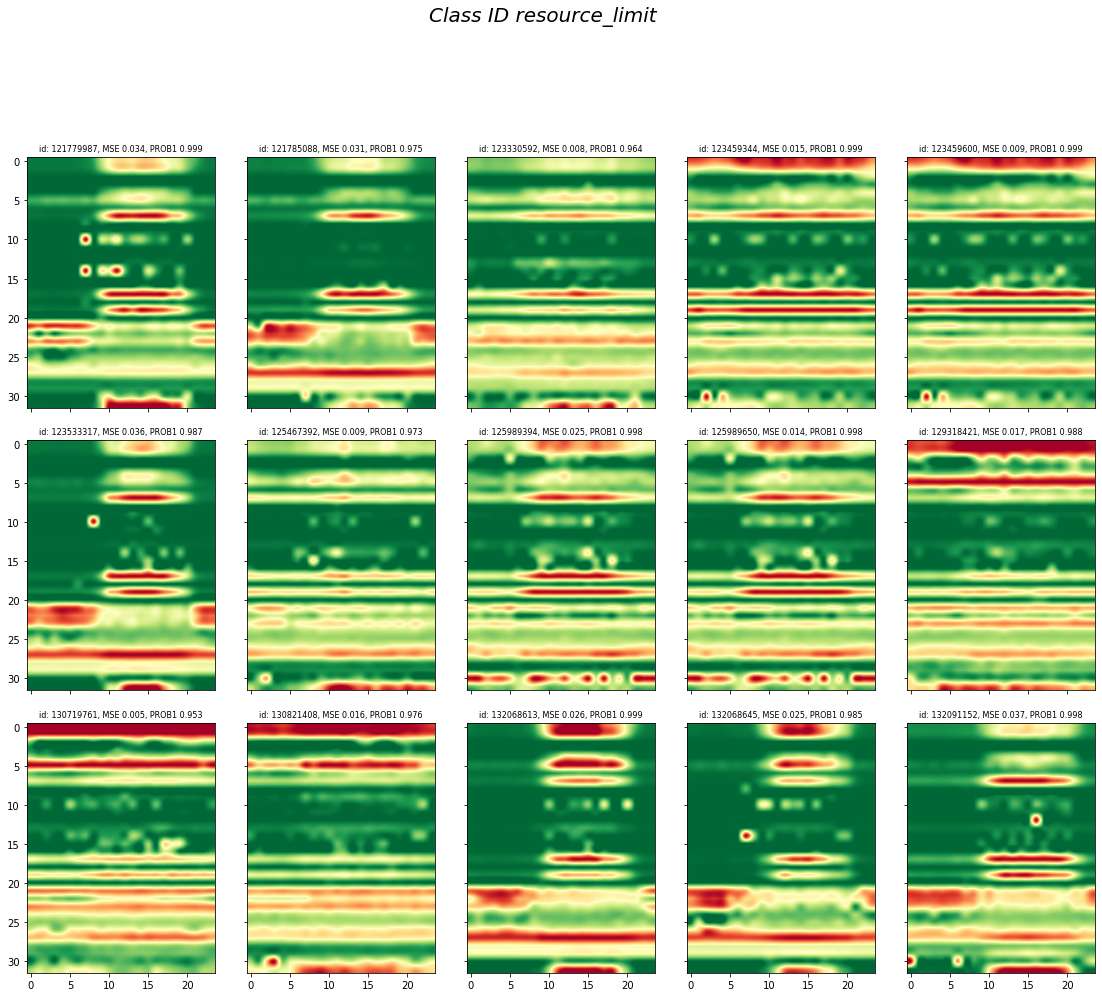

total samples: 15 / 1607
unique samples: 15 / 1607


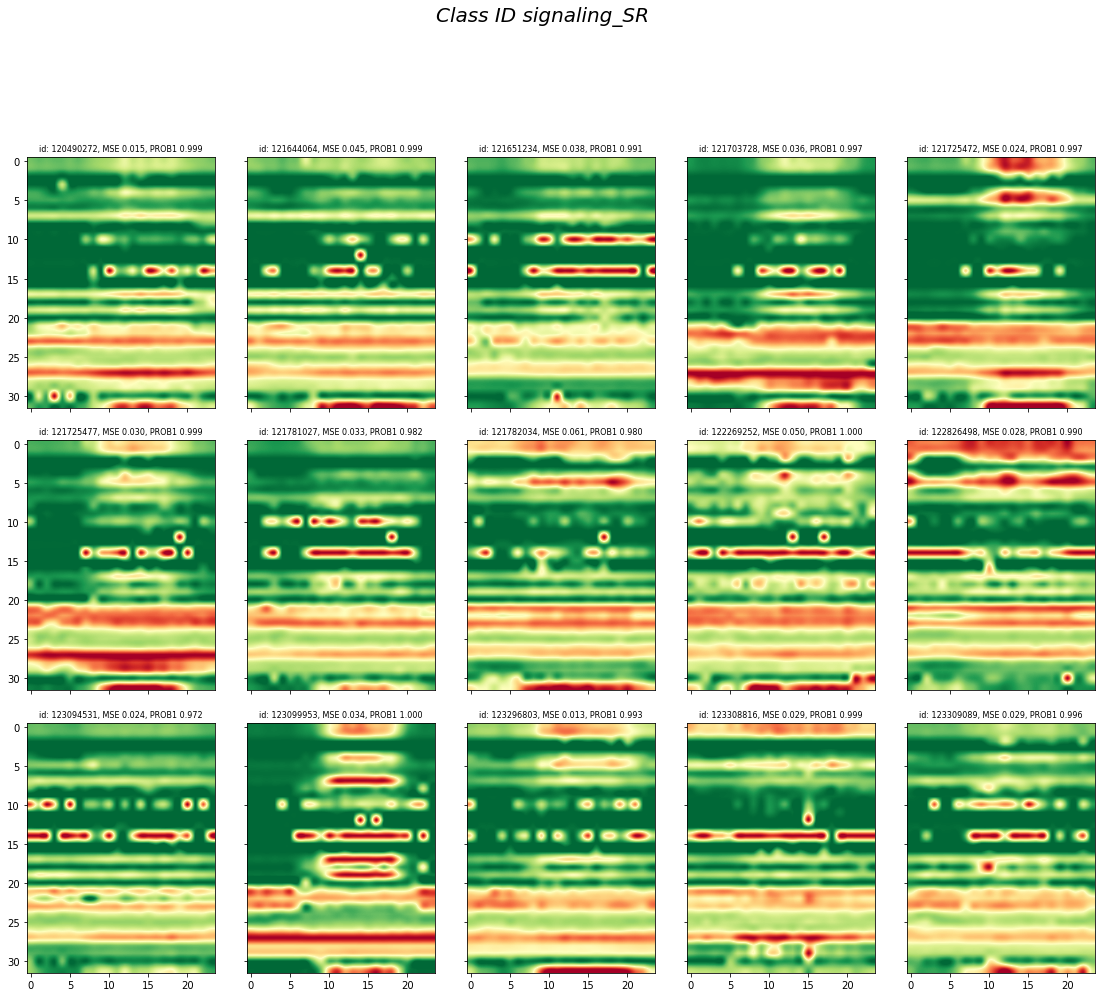

total samples: 15 / 108
unique samples: 15 / 108


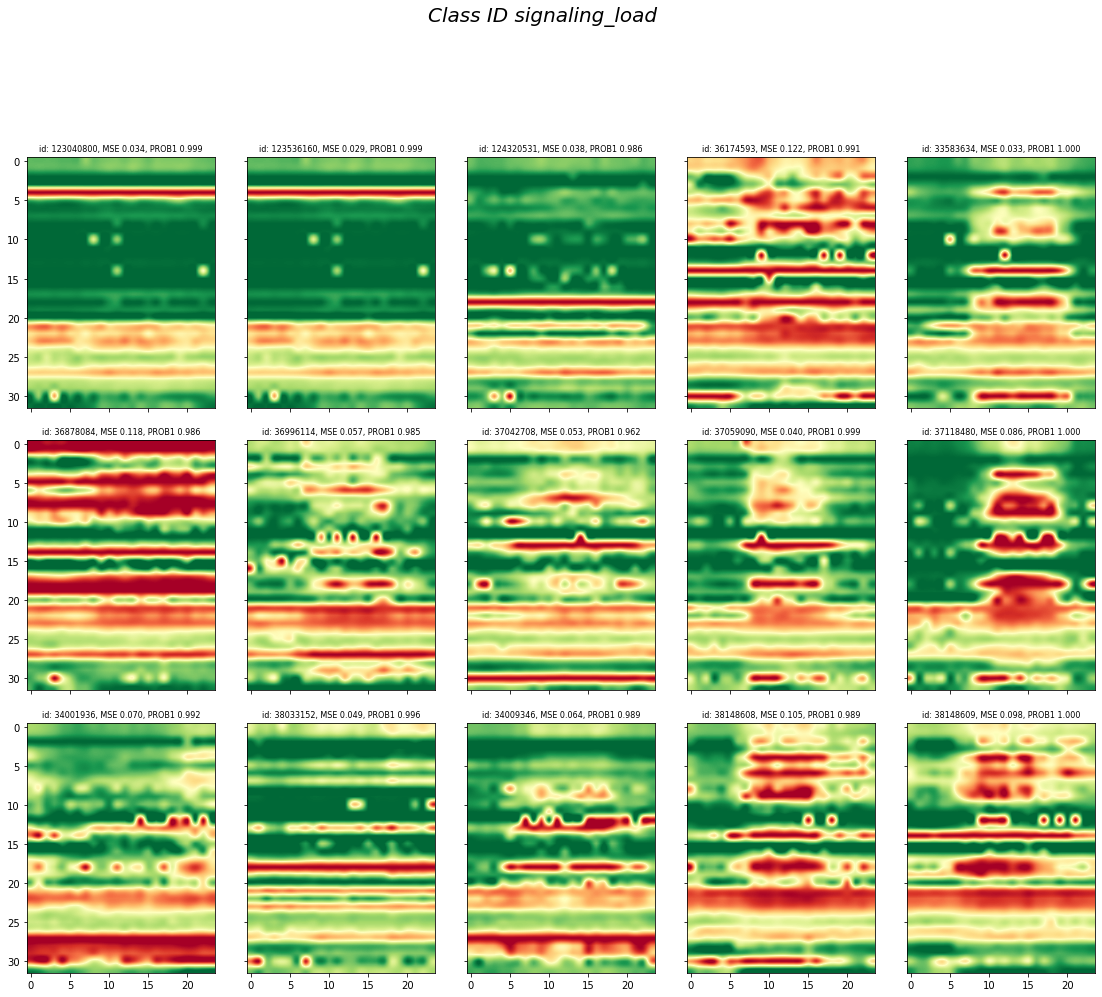

total samples: 15 / 3878
unique samples: 15 / 3878


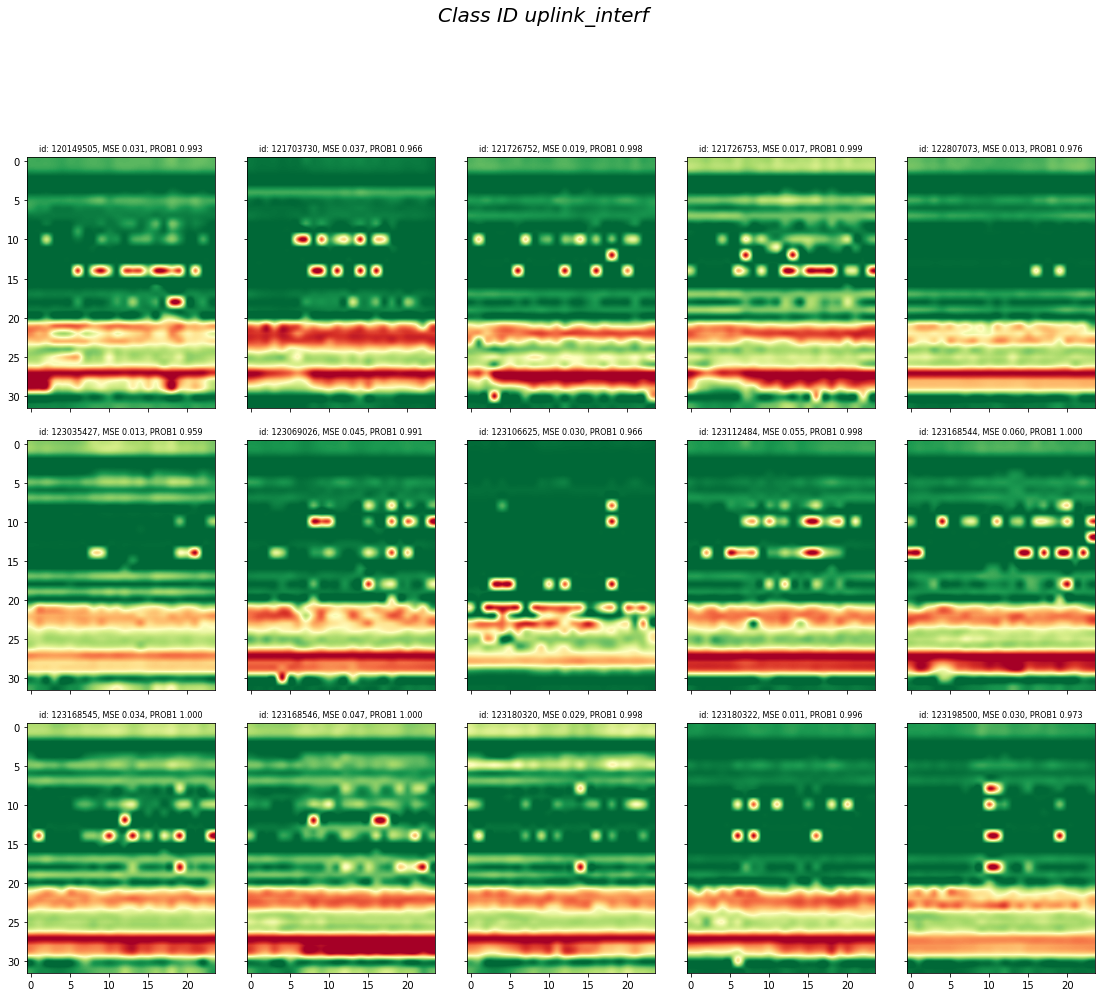

In [185]:
for y_ in np.unique(arr_class1):
    class_indx = np.where(arr_class1 == y_)[0]
    feat_norm_sub = feat_norm[class_indx]
    arr_cell_id_sub = arr_cell_id[class_indx]
    arr_prob1_sub = arr_prob1[class_indx]
    arr_mse_sub = arr_mse[class_indx]
    def_kwargs = {
        'X': feat_norm_sub,
        'arr_mse': arr_mse_sub,
        'arr_ids': arr_cell_id_sub, # the ID of each image belonging to
        'arr_prob1': arr_prob1_sub,
        'arr_labels':None,  # the label of each image belonging to
        'category': y_,
        'set_random': False,
        'figsize': (20, 15),
        'title_size': 8,
        'nrows': 3,
        'ncols': 5,
    }

    dk.mgcMultiHeat(**def_kwargs)

## make traindata

In [30]:
print(feat_norm_wide.shape, arr_cell_id.shape, arr_class1.shape, arr_prob1.shape, arr_mse.shape)

(28302, 768) (28302,) (28302,) (28302,) (28302,)


In [31]:
sio.savemat("../../data/raw/cic/traindata.mat",
            {'X': feat_norm_wide, 'gtlabels': arr_class1, 'id': arr_cell_id, 'prob1': arr_prob1, 'mse': arr_mse})

In [190]:
!ls ../../data/raw/v1/dcc/cic/

df_cic_5000_perclass_20200822.csv.parquet.gzip
traindata.mat


## make graph

In [33]:
def mkNN(X, k, measure='euclidean'):
    """
    Construct mutual_kNN for large scale dataset

    If j is one of i's closest neighbors and i is also one of j's closest members,
    the edge will appear once with (i,j) where i < j.

    Parameters
    ----------
    X : [n_samples, n_dim] array
    k : int
      number of neighbors for each sample in X
    Returns
    -------
    weights 
    2d array: [the lengeth of X, 3] 
    Like: 
    [0, 10, 2.04]  # the distance is 2.04 from data point 0 to 10
    [0, 16,  2.36] # the distance is 2.36 from data point 0 to 16
    ...
    """
    from scipy.spatial import distance
    from scipy.sparse import csr_matrix, triu, find
    from scipy.sparse.csgraph import minimum_spanning_tree

    samples = X.shape[0]
    batchsize = 10000
    b = np.arange(k + 1)
    b = tuple(b[1:].ravel())

    z = np.zeros((samples, k))
    weigh = np.zeros_like(z)

    # This loop speeds up the computation by operating in batches
    # This can be parallelized to further utilize CPU/GPU resource
    for x in np.arange(0, samples, batchsize):
        start = x
        end = min(x + batchsize, samples)

        w = distance.cdist(X[start:end], X, measure)

        y = np.argpartition(w, b, axis=1)

        z[start:end, :] = y[:, 1:k + 1]
        weigh[start:end, :] = np.reshape(w[tuple(np.repeat(np.arange(end - start), k)), tuple(y[:, 1:k + 1].ravel())],
                                         (end - start, k))
        del (w)

    ind = np.repeat(np.arange(samples), k)

    P = csr_matrix((np.ones((samples * k)), (ind.ravel(), z.ravel())), shape=(samples, samples))
    Q = csr_matrix((weigh.ravel(), (ind.ravel(), z.ravel())), shape=(samples, samples))

    Tcsr = minimum_spanning_tree(Q)
    P = P.minimum(P.transpose()) + Tcsr.maximum(Tcsr.transpose())
    P = triu(P, k=1)

    return np.asarray(find(P)).T


In [34]:
dict_params_make_graph = {
    'k': 50,
    'preprocess': None,
    'algo': 'mknn',
    'measure': 'cosine',
    'isPCA': None,
}


In [36]:
feat_norm_wide.shape

(28302, 768)

In [37]:
X_graph = mkNN(feat_norm_wide, k=dict_params_make_graph['k'], measure=dict_params_make_graph['measure'])

In [38]:
1

1

In [39]:
X_graph.shape

(179469, 3)

In [40]:
X_graph

array([[0.00000000e+00, 1.30000000e+01, 1.00000000e+00],
       [2.00000000e+00, 1.80000000e+01, 1.04860614e-01],
       [5.00000000e+00, 3.70000000e+01, 1.00000000e+00],
       ...,
       [2.26660000e+04, 2.83010000e+04, 1.08369149e-01],
       [2.41250000e+04, 2.83010000e+04, 1.07544892e+00],
       [2.82980000e+04, 2.83010000e+04, 1.00000000e+00]])

In [41]:
np.max(X_graph, axis=0)

array([2.82980000e+04, 2.83010000e+04, 1.26842424e+00])

In [44]:
sio.savemat("../../data/raw/cic/pretrained.mat", mdict={'X': feat_norm_wide, 'w': X_graph[:, :3], 'gtlabels': arr_class1, 'id': arr_cell_id, 'prob1': arr_prob1, 'mse': arr_mse})

# pretraining SDAE

In [64]:
import torch
import torch.nn as nn

import torch.nn.functional as F
import torch.nn.init as init


In [77]:
from src.models.dcc.pretraining import train, test

In [78]:
from src.models.dcc.SDAE import SDAE

In [ ]:
o

In [83]:
import src.models.dcc.config as cfg

In [84]:
cfg.__C.ROOT_DIR

'/Users/jasper/dev/mmc'

In [92]:
cfg.get_data_dir('smmc')

'/Users/jasper/dev/mmc/data/raw/v1/dcc/smmc'

In [88]:
cfg.get_output_dir('smmc')

'/Users/jasper/dev/mmc/data/raw/v1/dcc/smmc/results'

In [114]:
data = sio.loadmat(os.path.join(cfg.get_data_dir('smmc'), 'outlier_data.mat'), mat_dtype=True)

In [116]:
data['X'].shape

[autoreload of src.models.dcc.pretraining failed: Traceback (most recent call last):
  File "/Users/jasper/opt/miniconda3/envs/mmc/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Users/jasper/opt/miniconda3/envs/mmc/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/Users/jasper/opt/miniconda3/envs/mmc/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/jasper/opt/miniconda3/envs/mmc/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/jasper/dev/mmc/src/models/dcc/pretraining.py", line 6, in <module>
    from config import

(7173, 960)

In [118]:
960/24

40.0

In [115]:
data

{'X': array([[0.49669343, 0.14019979, 0.17625823, ..., 0.45432545, 0.78161616,
         0.73894681],
        [0.37539515, 0.13891856, 0.1938366 , ..., 0.27448274, 0.45855641,
         0.94797384],
        [1.        , 0.75793459, 0.        , ..., 0.12451608, 0.4578601 ,
         0.67407918],
        ...,
        [0.42153699, 0.12055382, 0.17907545, ..., 0.58004684, 0.24613929,
         0.08634149],
        [0.58372035, 0.11306038, 0.00856297, ..., 0.24914325, 0.49478616,
         0.83213314],
        [0.45414437, 0.18129893, 0.14306835, ..., 0.50939882, 0.68329714,
         0.67644943]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Aug 21 16:29:46 2020',
 '__version__': '1.0',
 'id': array([[array(['000001.SZ_2013-01-29'], dtype='<U20'),
         array(['000001.SZ_2014-12-18'], dtype='<U20'),
         array(['000001.SZ_2015-05-14'], dtype='<U20'), ...,
         array(['603996.SH_2018-07-05'], dtype='<U20'),
         array(['603997.SH_2017-0

In [106]:
train_data = data['X'][:].astype(np.float32)

In [107]:
train_labels = np.squeeze(data['Y'][:])

In [108]:
train_labels

array([], shape=(0, 0), dtype=float64)

## data preparation

In [79]:
net_sdae = SDAE(dim=[784, 500, 500, 2000, 10], dropout=0.2, slope=0)